# 2.1 Take all the features and find out which algorithm produces the best result. 

In [32]:
import numpy as np
import pandas as pd

In [33]:
df = pd.read_csv("feature_vectors_syscallsbinders_frequency_5_Cat.csv") #  read a CSV file named into a DataFrame called df
target = "Class" # target variable or outcome variable, which represents the variable that you're trying to predict or model.

In [34]:
df.shape # This will output a tuple with two elements: the number of rows and the number of columns in the DataFrame.

(11598, 471)

In [35]:
from sklearn.preprocessing import LabelEncoder # imports the LabelEncoder class from the scikit-learn library

encoder = LabelEncoder() # creates an instance of the LabelEncoder class, which will be used to perform the label encoding

df[target] = encoder.fit_transform(df[target]) #  label encoding transformation to the target column of the DataFrame df

In [36]:
df.info() # info() method in pandas DataFrame provides a concise summary of the DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11598 entries, 0 to 11597
Columns: 471 entries, ACCESS_PERSONAL_INFO___ to Class
dtypes: int64(471)
memory usage: 41.7 MB


In [37]:
df[target].value_counts() #  print the counts of each unique value in the target column of the DataFrame.

Class
2    3904
3    2546
1    2100
4    1795
0    1253
Name: count, dtype: int64

In [38]:
X = df.loc[: , df.columns!=target] # X will contain all the features (columns) of the DataFrame df except for the target column
# X = X.loc[: , X.columns!="NAME"]
y = df[target] # y will contain the target column, which represents the target variable.

In [39]:
from sklearn.model_selection import train_test_split # Imports the train_test_split function from scikit-learn's model_selection module.

#  Splits features (X) and target variable (y) into random train and test subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

In [40]:
y_train.value_counts()

Class
2    3130
3    2007
1    1682
4    1449
0    1010
Name: count, dtype: int64

# BruteForce Tuning for RandomForest

## Default Param

In [14]:
from sklearn.ensemble import RandomForestClassifier # Importing RandomForestClassifier from scikit-learn.
rf_default = RandomForestClassifier() # Creating an instance of RandomForestClassifier with default hyperparameters.
rf_default.fit(X_train, y_train) # Fitting the RandomForestClassifier model to the training data (X_train, y_train)
y_pred_test=rf_default.predict(X_test) # Using the trained RandomForestClassifier model (rf_default) to make predictions on the test data (X_test).


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score # Importing necessary evaluation metrics from scikit-learn.

# Print confusion matrix, classification report, and accuracy
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_test))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_test))
print("\nAccuracy:", accuracy_score(y_test, y_pred_test))

Confusion Matrix:
[[225   1   1   6  10]
 [ 10 382   7  11   8]
 [  0   4 766   2   2]
 [ 14  12   7 488  18]
 [  8   2   4   7 325]]

Classification Report:
              precision    recall  f1-score   support

           1       0.88      0.93      0.90       243
           2       0.95      0.91      0.93       418
           3       0.98      0.99      0.98       774
           4       0.95      0.91      0.93       539
           5       0.90      0.94      0.92       346

    accuracy                           0.94      2320
   macro avg       0.93      0.93      0.93      2320
weighted avg       0.94      0.94      0.94      2320


Accuracy: 0.9422413793103448


## Tuning n_estimators

1/250 round completed......................... Test Accuracy: 0.8793103448275862  >>>>>>> Train Accuracy: 0.953114895451606
6/250 round completed......................... Test Accuracy: 0.9215517241379311  >>>>>>> Train Accuracy: 0.9926708342315154
11/250 round completed......................... Test Accuracy: 0.9267241379310345  >>>>>>> Train Accuracy: 0.9970898900625135
16/250 round completed......................... Test Accuracy: 0.9344827586206896  >>>>>>> Train Accuracy: 0.9981677085578788
21/250 round completed......................... Test Accuracy: 0.9353448275862069  >>>>>>> Train Accuracy: 0.9984910541064884
26/250 round completed......................... Test Accuracy: 0.9396551724137931  >>>>>>> Train Accuracy: 0.9983832722569519
31/250 round completed......................... Test Accuracy: 0.9418103448275862  >>>>>>> Train Accuracy: 0.998598835956025
36/250 round completed......................... Test Accuracy: 0.9448275862068966  >>>>>>> Train Accuracy: 0.9985988359560

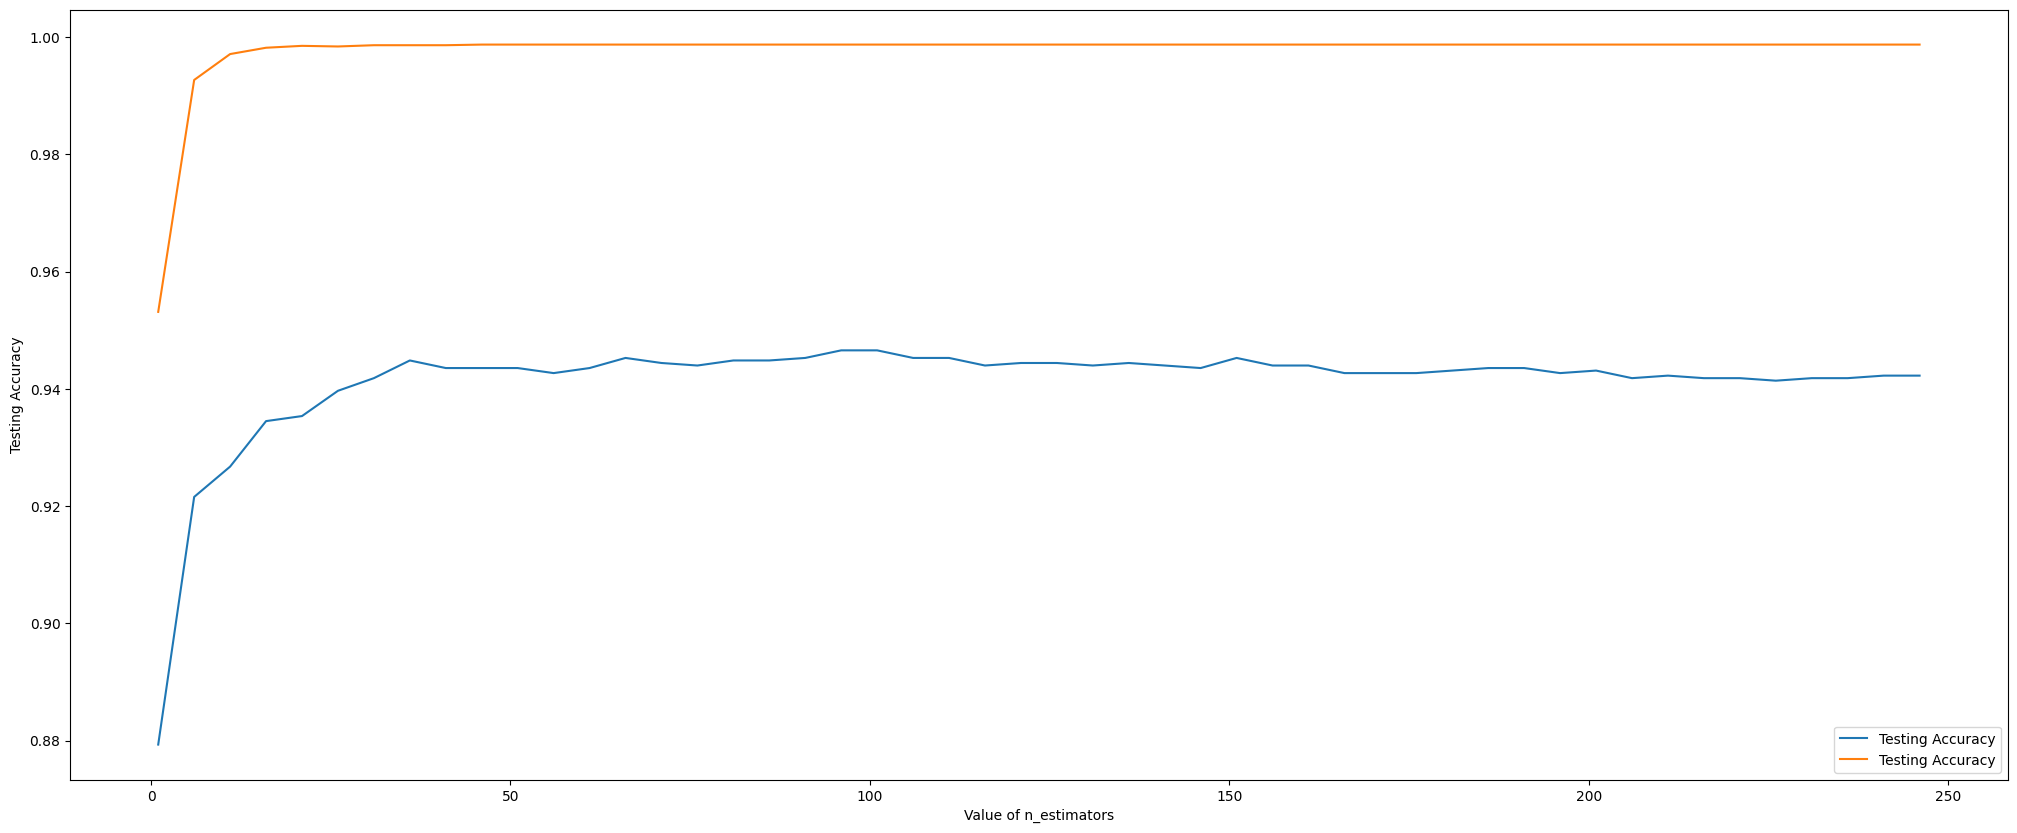

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
N=250
k_range = range (1,N+1,5)
scores={}
scores_list = []
scores_list_train = []
for k in k_range:
  classifier = RandomForestClassifier(n_estimators=k,random_state=0)
  classifier.fit(X_train, y_train)


  y_pred=classifier.predict(X_test)
  test_accu = accuracy_score(y_test,y_pred)
  scores[k] = test_accu
  scores_list.append(test_accu)

  y_pred=classifier.predict(X_train)
  train_accu = accuracy_score(y_train,y_pred)
  scores_list_train.append(train_accu)

  print(str(k)+"/"+str(N)+" round completed......................... Test Accuracy: "+str(test_accu)," >>>>>>> Train Accuracy: "+str(train_accu))



%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.plot(k_range,scores_list_train)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')
plt.legend(["Testing Accuracy", "Testing Accuracy"], loc=0, frameon=True)


print("The best n_estimators:")
best_estimator=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_estimator)

## Tuning max_depth

1/50 round completed......................... Test Accuracy: 0.5357758620689655  >>>>>>> Train Accuracy: 0.5275921534813537
6/50 round completed......................... Test Accuracy: 0.8663793103448276  >>>>>>> Train Accuracy: 0.8792843285190773
11/50 round completed......................... Test Accuracy: 0.9301724137931034  >>>>>>> Train Accuracy: 0.9772580297477905
16/50 round completed......................... Test Accuracy: 0.9422413793103448  >>>>>>> Train Accuracy: 0.9954731623194654
21/50 round completed......................... Test Accuracy: 0.944396551724138  >>>>>>> Train Accuracy: 0.9983832722569519
26/50 round completed......................... Test Accuracy: 0.9448275862068966  >>>>>>> Train Accuracy: 0.9987066178055616
31/50 round completed......................... Test Accuracy: 0.9456896551724138  >>>>>>> Train Accuracy: 0.9987066178055616
36/50 round completed......................... Test Accuracy: 0.9456896551724138  >>>>>>> Train Accuracy: 0.9987066178055616
41/

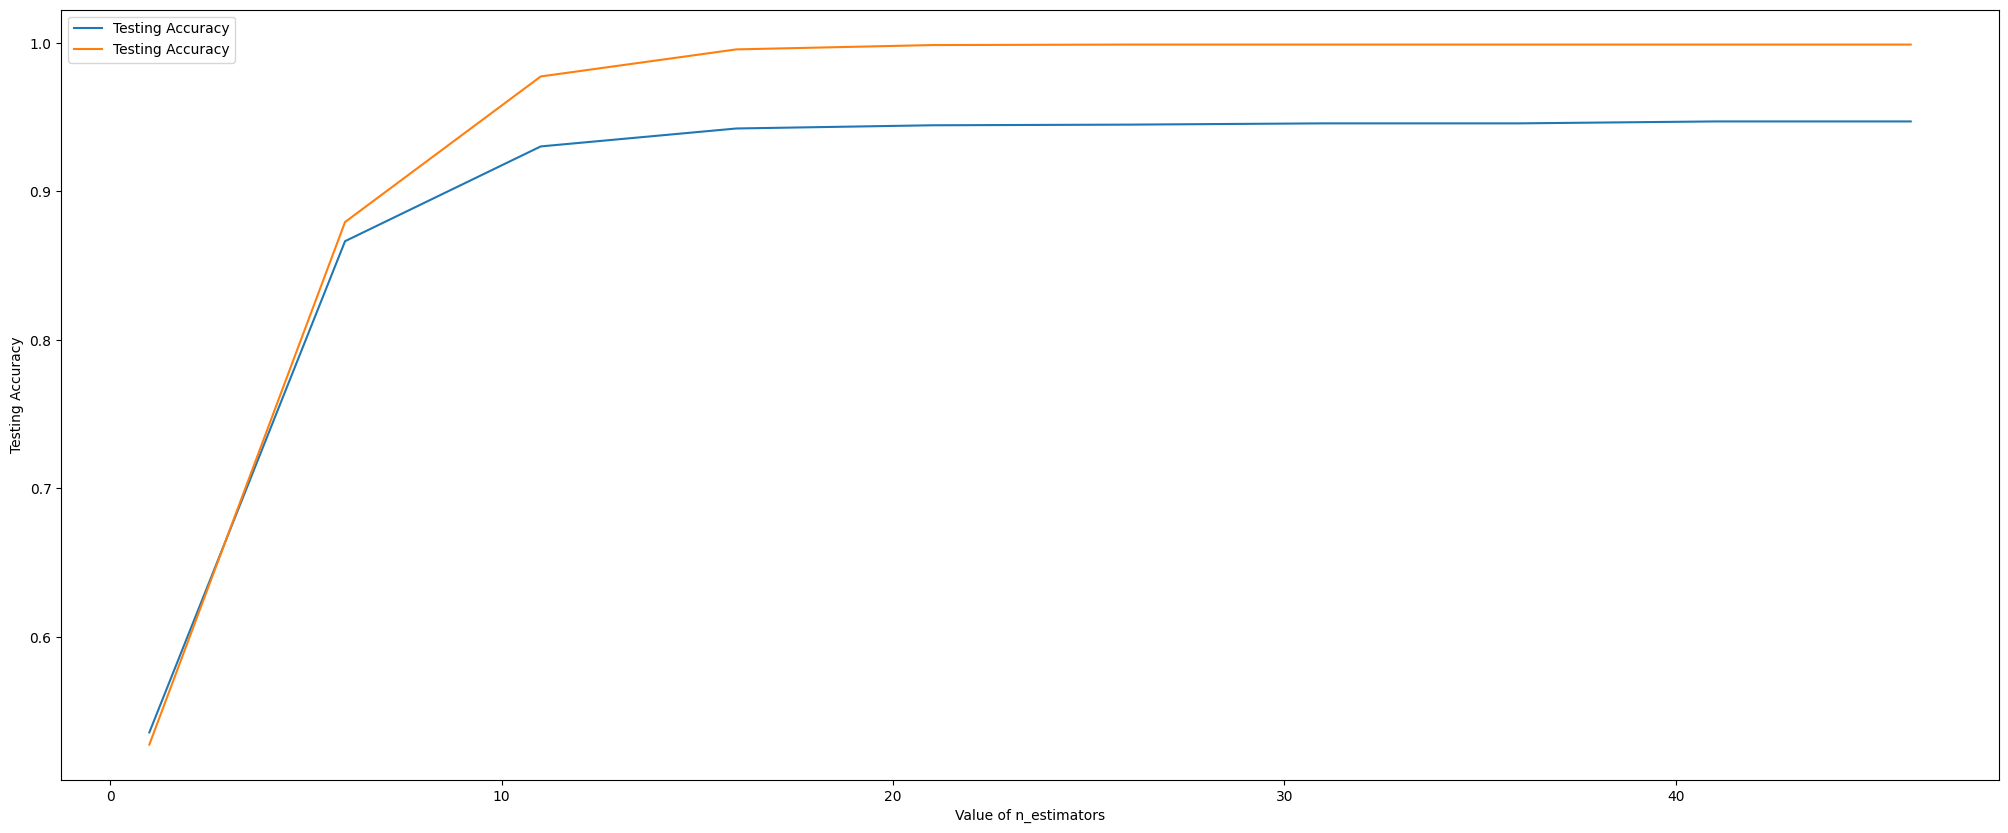

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
N=50
k_range = range (1,N+1,5)
scores={}
scores_list = []
scores_list_train = []
for k in k_range:
  classifier = RandomForestClassifier(max_depth=k,random_state=0)
  classifier.fit(X_train, y_train)

  y_pred=classifier.predict(X_test)
  test_accu = accuracy_score(y_test,y_pred)
  scores[k] = test_accu
  scores_list.append(test_accu)

  y_pred=classifier.predict(X_train)
  train_accu = accuracy_score(y_train,y_pred)
  scores_list_train.append(train_accu)


  print(str(k)+"/"+str(N)+" round completed......................... Test Accuracy: "+str(test_accu)," >>>>>>> Train Accuracy: "+str(train_accu))



%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.plot(k_range,scores_list_train)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')
plt.legend(["Testing Accuracy", "Testing Accuracy"], loc=0, frameon=True)


print("The best Depth:")
best_depth=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_depth)

In [17]:
# Creating an instance of the RandomForestClassifier class
rf_all = RandomForestClassifier(n_estimators=best_estimator,max_depth=best_depth,random_state=0) 
rf_all.fit(X_train, y_train) # trains (fits) the RandomForestClassifier model on the training data.
y_pred=rf_all.predict(X_test) # uses the trained RandomForestClassifier model (rf_all) to make predictions on the test data (X_test).
print("Accuracy: ",accuracy_score(y_test,y_pred))

Accuracy:  0.946551724137931


In [18]:
rf_all = RandomForestClassifier(n_estimators=best_estimator,max_depth=best_depth,random_state=0)
rf_all.fit(X_train, y_train)
y_pred=rf_all.predict(X_train) # predicts the target labels (y_pred) for the training data (X_train) using the trained rf_all model.
print("Accuracy: ",accuracy_score(y_train,y_pred))

Accuracy:  0.9987066178055616


# BruteForce Tuning for GradientBoosting

## Default Param

In [19]:
from sklearn.ensemble import GradientBoostingClassifier
gb_default = GradientBoostingClassifier()
gb_default.fit(X_train, y_train)
y_pred_test=gb_default.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Print confusion matrix, classification report, and accuracy
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_test))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_test))
print("\nAccuracy:", accuracy_score(y_test, y_pred_test))

Confusion Matrix:
[[216   3   2  14   8]
 [ 10 372  10  20   6]
 [  0   5 763   5   1]
 [ 15  14  10 489  11]
 [  4   4  11  13 314]]

Classification Report:
              precision    recall  f1-score   support

           1       0.88      0.89      0.89       243
           2       0.93      0.89      0.91       418
           3       0.96      0.99      0.97       774
           4       0.90      0.91      0.91       539
           5       0.92      0.91      0.92       346

    accuracy                           0.93      2320
   macro avg       0.92      0.92      0.92      2320
weighted avg       0.93      0.93      0.93      2320


Accuracy: 0.928448275862069


## Tuning n_estimators

1/250 round completed......................... Test Accuracy: 0.3353448275862069  >>>>>>> Train Accuracy: 0.33875835309333907
6/250 round completed......................... Test Accuracy: 0.7995689655172413  >>>>>>> Train Accuracy: 0.8073938348782065
11/250 round completed......................... Test Accuracy: 0.8349137931034483  >>>>>>> Train Accuracy: 0.8437163181720199
16/250 round completed......................... Test Accuracy: 0.8676724137931034  >>>>>>> Train Accuracy: 0.8748652726880793
21/250 round completed......................... Test Accuracy: 0.8853448275862069  >>>>>>> Train Accuracy: 0.8939426600560466
26/250 round completed......................... Test Accuracy: 0.896551724137931  >>>>>>> Train Accuracy: 0.9054753179564561
31/250 round completed......................... Test Accuracy: 0.9012931034482758  >>>>>>> Train Accuracy: 0.9119422289286484
36/250 round completed......................... Test Accuracy: 0.9038793103448276  >>>>>>> Train Accuracy: 0.91765466695

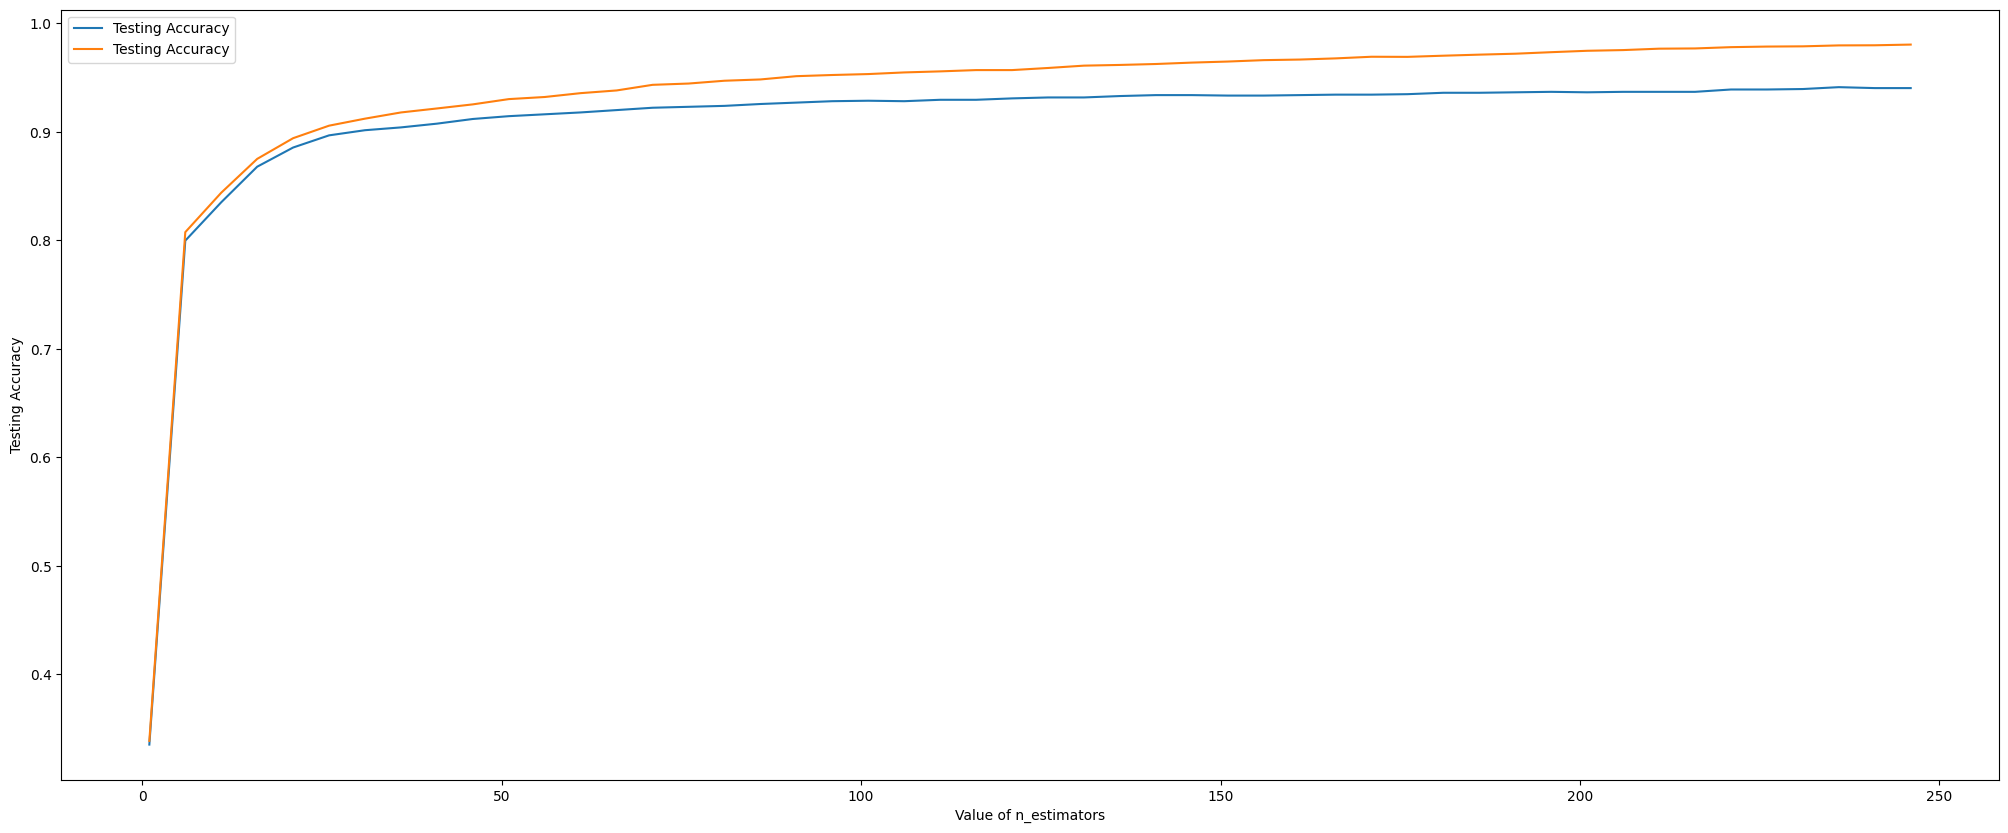

In [20]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
N=250
k_range = range (1,N+1,5)
scores={}
scores_list = []
scores_list_train = []
for k in k_range:
  classifier = GradientBoostingClassifier(n_estimators=k,random_state=0)
  classifier.fit(X_train, y_train)


  y_pred=classifier.predict(X_test)
  test_accu = accuracy_score(y_test,y_pred)
  scores[k] = test_accu
  scores_list.append(test_accu)

  y_pred=classifier.predict(X_train)
  train_accu = accuracy_score(y_train,y_pred)
  scores_list_train.append(train_accu)

  print(str(k)+"/"+str(N)+" round completed......................... Test Accuracy: "+str(test_accu)," >>>>>>> Train Accuracy: "+str(train_accu))



%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.plot(k_range,scores_list_train)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')
plt.legend(["Testing Accuracy", "Testing Accuracy"], loc=0, frameon=True)


print("The best n_estimators:")
best_estimator=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_estimator)

## Tuning max_depth

1/50 round completed......................... Test Accuracy: 0.8573275862068965  >>>>>>> Train Accuracy: 0.8679672343177409
6/50 round completed......................... Test Accuracy: 0.9439655172413793  >>>>>>> Train Accuracy: 0.9963354171157577
11/50 round completed......................... Test Accuracy: 0.9491379310344827  >>>>>>> Train Accuracy: 0.9987066178055616
16/50 round completed......................... Test Accuracy: 0.9491379310344827  >>>>>>> Train Accuracy: 0.9987066178055616
21/50 round completed......................... Test Accuracy: 0.9439655172413793  >>>>>>> Train Accuracy: 0.9987066178055616
26/50 round completed......................... Test Accuracy: 0.934051724137931  >>>>>>> Train Accuracy: 0.9987066178055616
31/50 round completed......................... Test Accuracy: 0.9323275862068966  >>>>>>> Train Accuracy: 0.9987066178055616
36/50 round completed......................... Test Accuracy: 0.9310344827586207  >>>>>>> Train Accuracy: 0.9987066178055616
41/

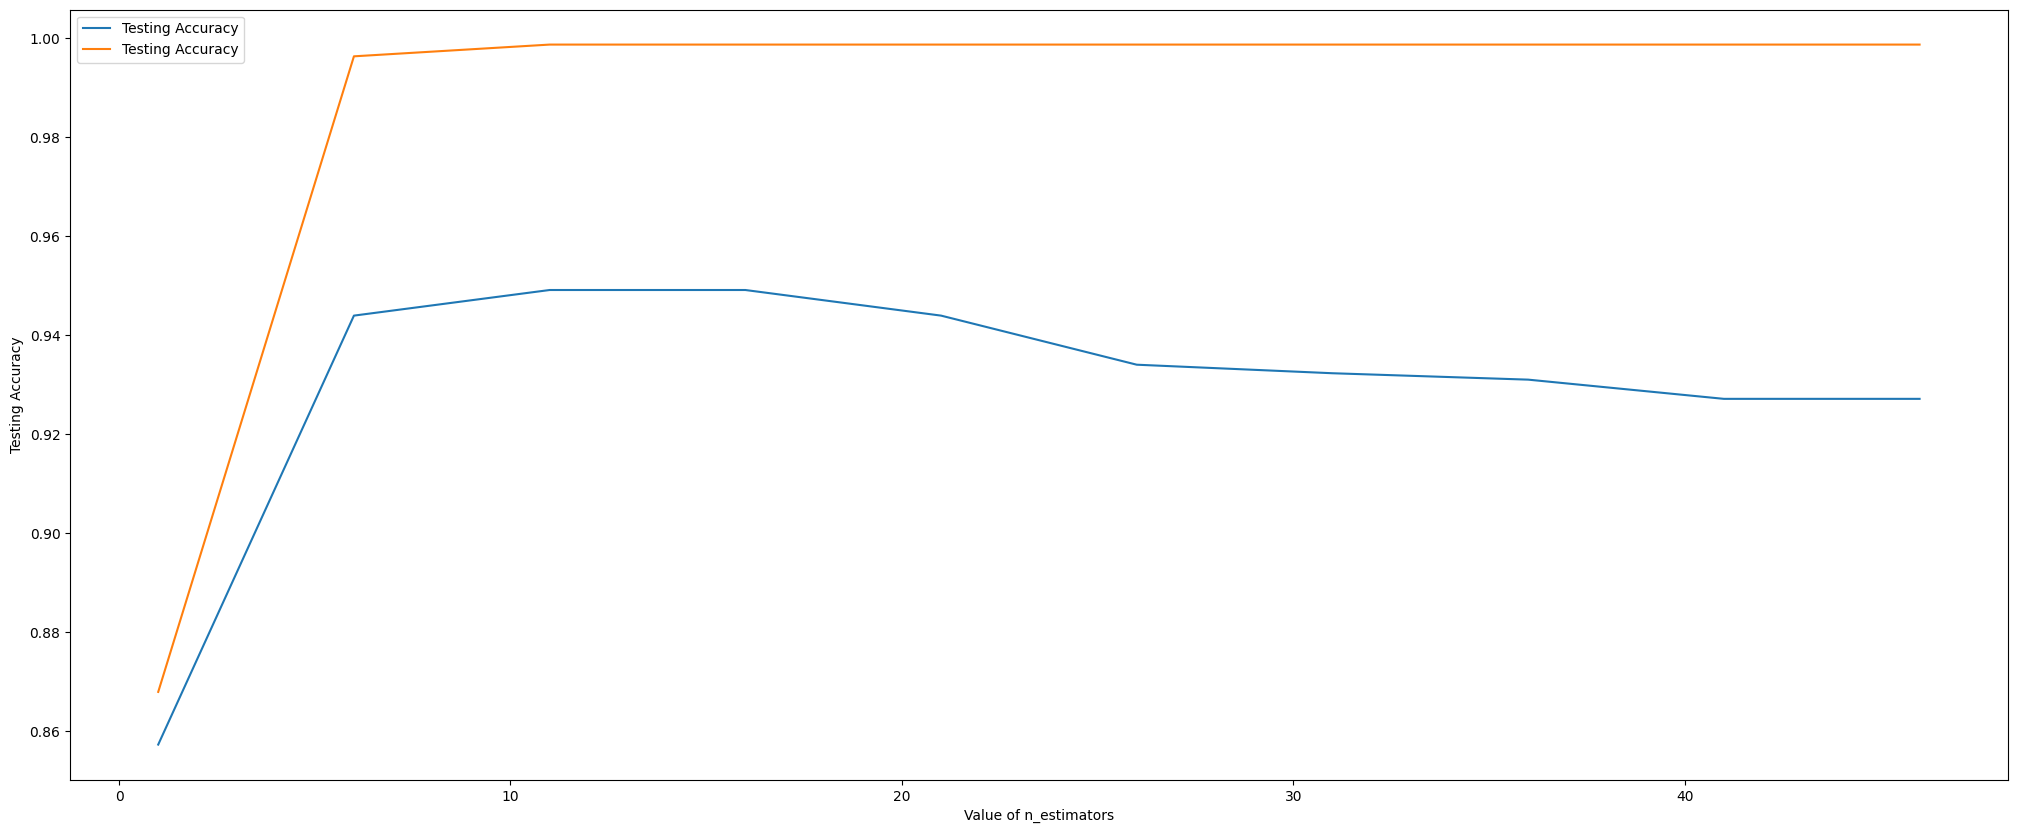

In [21]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
N=50
k_range = range (1,N+1,5)
scores={}
scores_list = []
scores_list_train = []
for k in k_range:
  classifier = GradientBoostingClassifier(max_depth=k,random_state=0)
  classifier.fit(X_train, y_train)

  y_pred=classifier.predict(X_test)
  test_accu = accuracy_score(y_test,y_pred)
  scores[k] = test_accu
  scores_list.append(test_accu)

  y_pred=classifier.predict(X_train)
  train_accu = accuracy_score(y_train,y_pred)
  scores_list_train.append(train_accu)


  print(str(k)+"/"+str(N)+" round completed......................... Test Accuracy: "+str(test_accu)," >>>>>>> Train Accuracy: "+str(train_accu))



%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.plot(k_range,scores_list_train)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')
plt.legend(["Testing Accuracy", "Testing Accuracy"], loc=0, frameon=True)


print("The best Depth:")
best_depth=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_depth)

In [22]:
gb_all = GradientBoostingClassifier(n_estimators=best_estimator,max_depth=best_depth,random_state=0)
gb_all.fit(X_train, y_train)
y_pred=gb_all.predict(X_test)
print("Accuracy: ",accuracy_score(y_test,y_pred))

Accuracy:  0.9487068965517241


In [23]:
gb_all = GradientBoostingClassifier(n_estimators=best_estimator,max_depth=best_depth,random_state=0)
gb_all.fit(X_train, y_train)
y_pred =gb_all.predict(X_train)
print("Accuracy: ",accuracy_score(y_train,y_pred))

Accuracy:  0.9987066178055616


# BruteForce Tuning for XGBoost

## Default Param

In [41]:
import xgboost as xgb
xg_default = xgb.XGBClassifier() # Create an instance of XGBoost classifier
xg_default.fit(X_train, y_train) # Train the classifier
y_pred_test = xg_default.predict(X_test) # Predict on the test data

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Print confusion matrix, classification report, and accuracy
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_test))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_test))
print("\nAccuracy:", accuracy_score(y_test, y_pred_test))

Confusion Matrix:
[[229   4   1   4   5]
 [  7 385   4  14   8]
 [  0   3 767   2   2]
 [ 15  15   9 489  11]
 [  5   3   4   3 331]]

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.94      0.92       243
           1       0.94      0.92      0.93       418
           2       0.98      0.99      0.98       774
           3       0.96      0.91      0.93       539
           4       0.93      0.96      0.94       346

    accuracy                           0.95      2320
   macro avg       0.94      0.94      0.94      2320
weighted avg       0.95      0.95      0.95      2320


Accuracy: 0.9487068965517241


## Tuning n_estimators

1/250 round completed......................... Test Accuracy: 0.8806034482758621  >>>>>>> Train Accuracy: 0.9065531364518216
6/250 round completed......................... Test Accuracy: 0.9193965517241379  >>>>>>> Train Accuracy: 0.9403966372062944
11/250 round completed......................... Test Accuracy: 0.9344827586206896  >>>>>>> Train Accuracy: 0.961737443414529
16/250 round completed......................... Test Accuracy: 0.9353448275862069  >>>>>>> Train Accuracy: 0.9710066824746713
21/250 round completed......................... Test Accuracy: 0.9400862068965518  >>>>>>> Train Accuracy: 0.9784436300926924
26/250 round completed......................... Test Accuracy: 0.940948275862069  >>>>>>> Train Accuracy: 0.9846949773658116
31/250 round completed......................... Test Accuracy: 0.9405172413793104  >>>>>>> Train Accuracy: 0.9890062513472732
36/250 round completed......................... Test Accuracy: 0.944396551724138  >>>>>>> Train Accuracy: 0.99180857943522

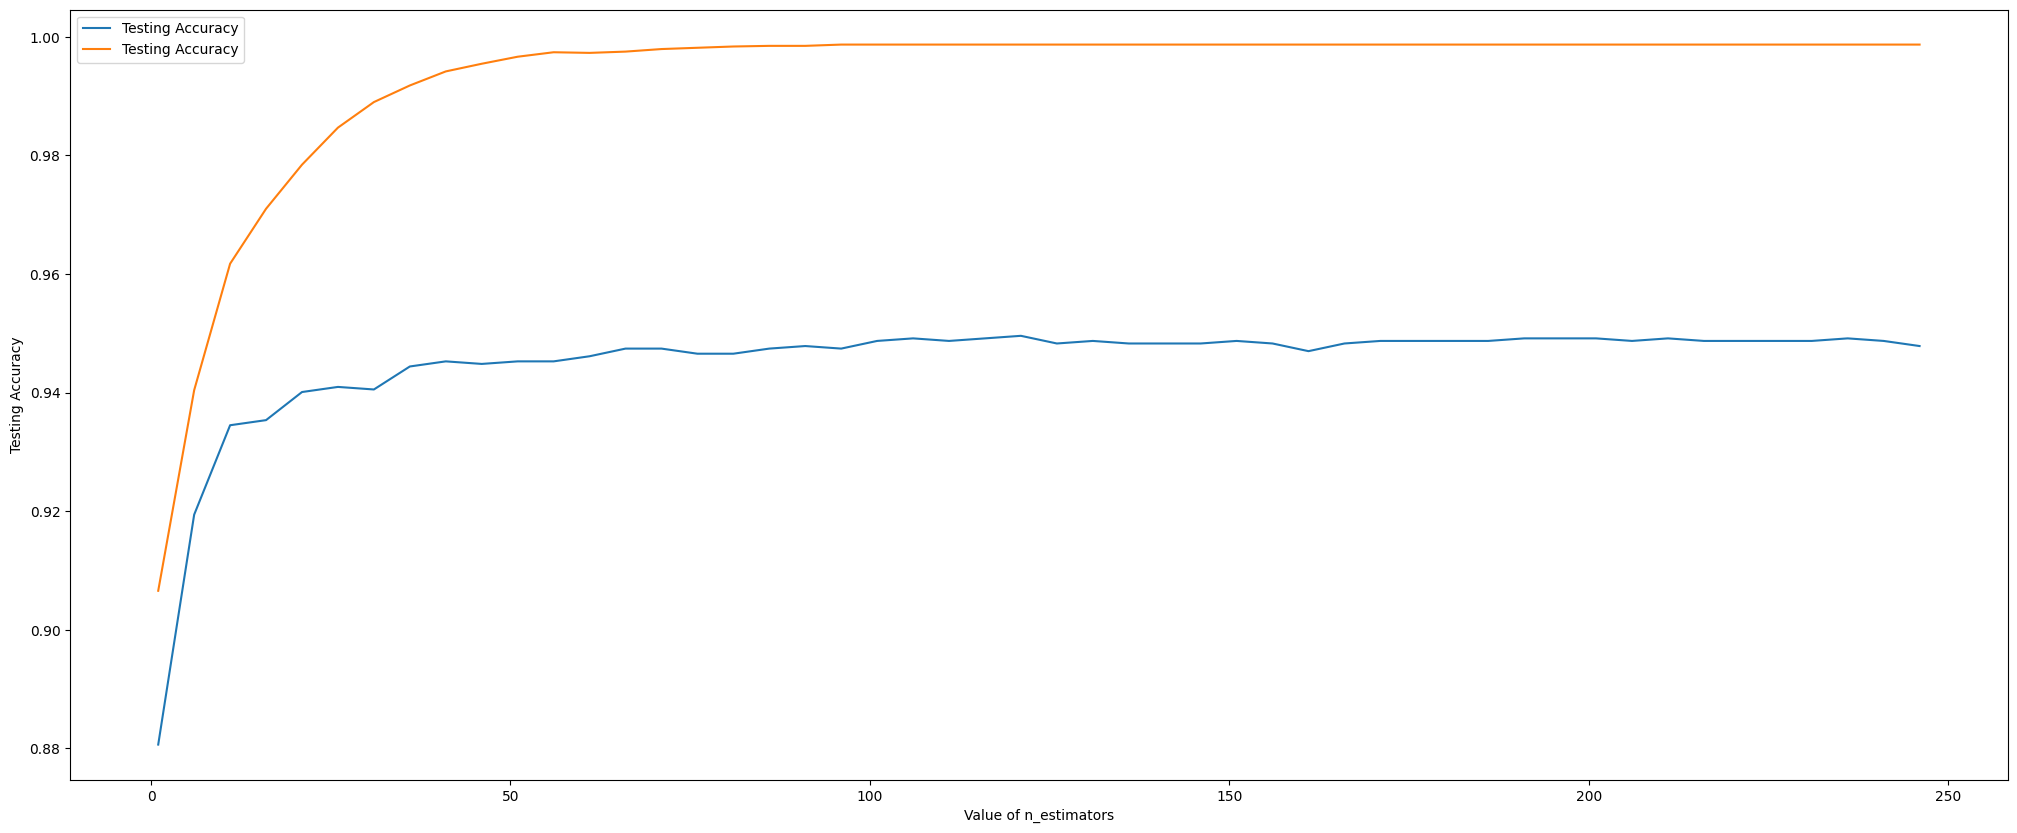

In [42]:
import xgboost as xgb
from sklearn.metrics import accuracy_score
N=250
k_range = range (1,N+1,5)
scores = {}
scores_list = []
scores_list_train = []
for k in k_range:
  classifier = xgb.XGBClassifier(n_estimators=k,random_state=0)
  classifier.fit(X_train, y_train)

 
  y_pred = classifier.predict(X_test)
  test_accu = accuracy_score(y_test,y_pred)
  scores[k] = test_accu
  scores_list.append(test_accu)

  y_pred = classifier.predict(X_train)
  train_accu = accuracy_score(y_train,y_pred)
  scores_list_train.append(train_accu)

  print(str(k)+"/"+str(N)+" round completed......................... Test Accuracy: "+str(test_accu)," >>>>>>> Train Accuracy: "+str(train_accu))



%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.plot(k_range,scores_list_train)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')
plt.legend(["Testing Accuracy", "Testing Accuracy"], loc=0, frameon=True)


print("The best n_estimators:")
best_estimator = list(scores.keys())[scores_list.index(max(scores_list))]
print(best_estimator)

## Tuning max_depth

1/50 round completed......................... Test Accuracy: 0.8862068965517241  >>>>>>> Train Accuracy: 0.8949126967018755
6/50 round completed......................... Test Accuracy: 0.9487068965517241  >>>>>>> Train Accuracy: 0.9987066178055616
11/50 round completed......................... Test Accuracy: 0.9469827586206897  >>>>>>> Train Accuracy: 0.9987066178055616
16/50 round completed......................... Test Accuracy: 0.9469827586206897  >>>>>>> Train Accuracy: 0.9987066178055616
21/50 round completed......................... Test Accuracy: 0.9504310344827587  >>>>>>> Train Accuracy: 0.9987066178055616
26/50 round completed......................... Test Accuracy: 0.9495689655172413  >>>>>>> Train Accuracy: 0.9987066178055616
31/50 round completed......................... Test Accuracy: 0.9474137931034483  >>>>>>> Train Accuracy: 0.9987066178055616
36/50 round completed......................... Test Accuracy: 0.9491379310344827  >>>>>>> Train Accuracy: 0.9987066178055616
41

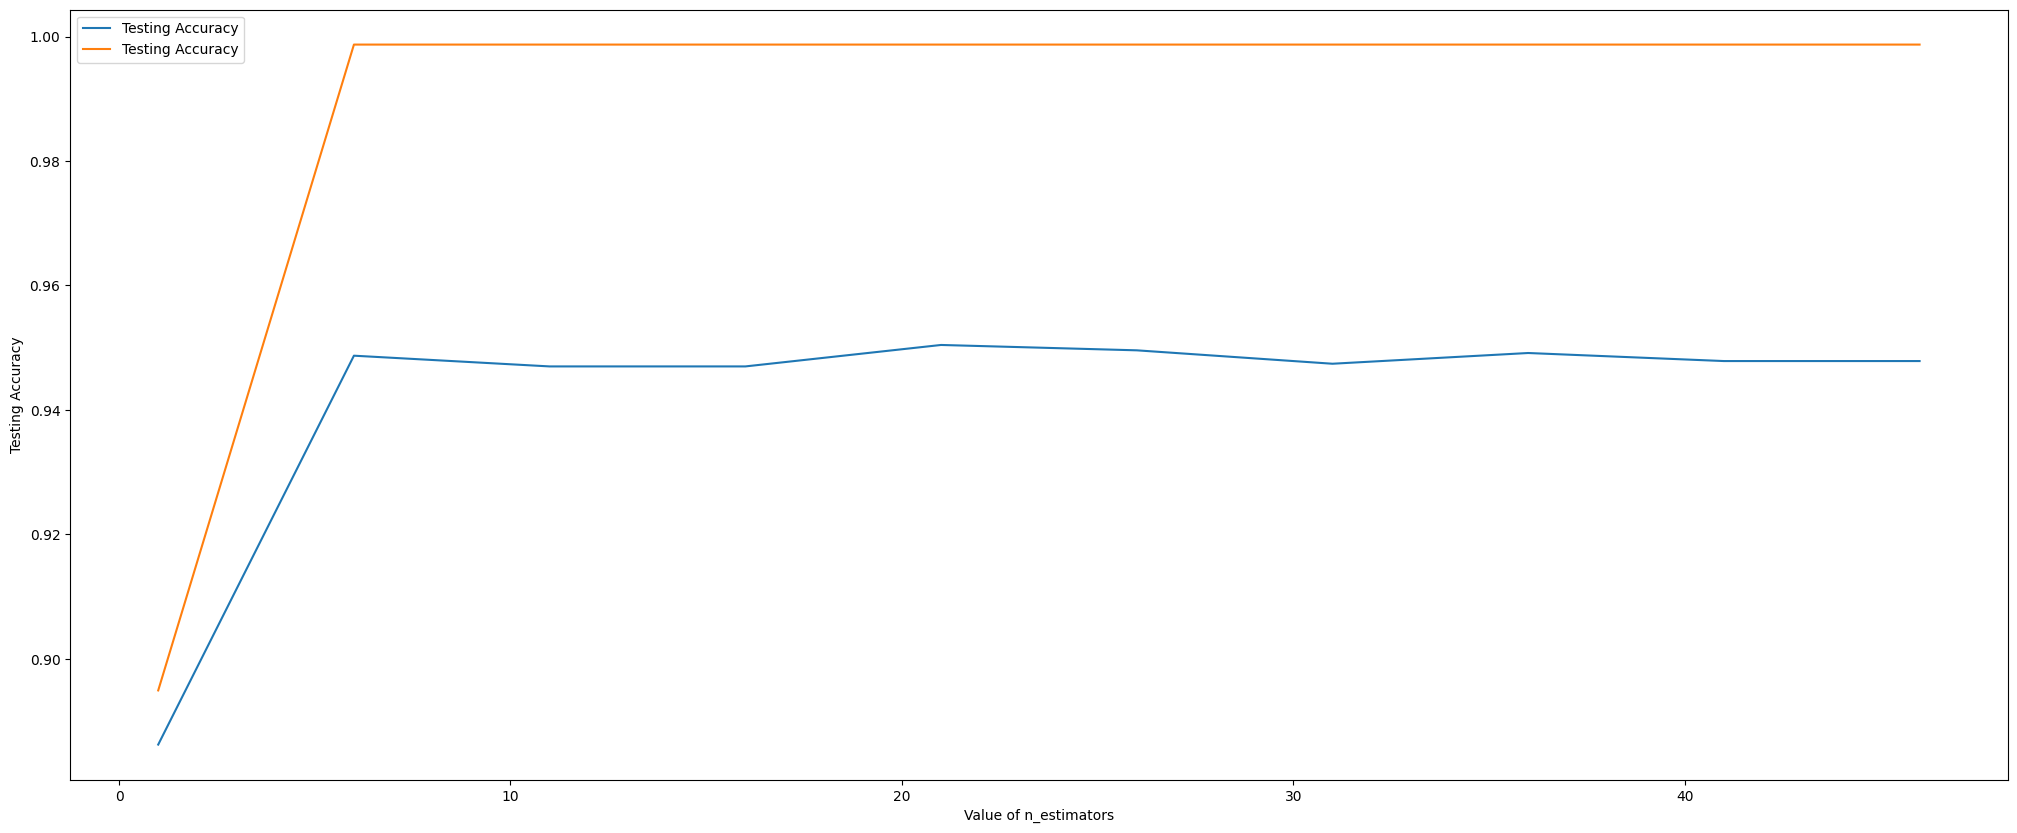

In [43]:
import xgboost as xgb
from sklearn.metrics import accuracy_score
N=50
k_range = range (1,N+1,5)
scores={}
scores_list = []
scores_list_train = []
for k in k_range:
  classifier = xgb.XGBClassifier(max_depth=k,random_state=0)
  classifier.fit(X_train, y_train)

  y_pred=classifier.predict(X_test)
  test_accu = accuracy_score(y_test,y_pred)
  scores[k] = test_accu
  scores_list.append(test_accu)

  y_pred=classifier.predict(X_train)
  train_accu = accuracy_score(y_train,y_pred)
  scores_list_train.append(train_accu)


  print(str(k)+"/"+str(N)+" round completed......................... Test Accuracy: "+str(test_accu)," >>>>>>> Train Accuracy: "+str(train_accu))



%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.plot(k_range,scores_list_train)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')
plt.legend(["Testing Accuracy", "Testing Accuracy"], loc=0, frameon=True)


print("The best Depth:")
best_depth = list(scores.keys())[scores_list.index(max(scores_list))]
print(best_depth)

In [44]:
xg_all = xgb.XGBClassifier(n_estimators=best_estimator,max_depth=best_depth,random_state=0)
xg_all.fit(X_train, y_train)
y_pred = xg_all.predict(X_test)
print("Accuracy: ",accuracy_score(y_test,y_pred))

Accuracy:  0.95


In [45]:
xg_all = xgb.XGBClassifier(n_estimators=best_estimator,max_depth=best_depth,random_state=0)
xg_all.fit(X_train, y_train)
y_pred = xg_all.predict(X_train)
print("Accuracy: ",accuracy_score(y_train,y_pred))

Accuracy:  0.9987066178055616


# BruteForce Tuning for boost-histogram

## Default Param

In [46]:
from sklearn.ensemble import HistGradientBoostingClassifier
hg_default = HistGradientBoostingClassifier() 
hg_default.fit(X_train, y_train) 
y_pred_test = hg_default.predict(X_test) 

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_test))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_test))
print("\nAccuracy:", accuracy_score(y_test, y_pred_test))

Confusion Matrix:
[[229   2   0   7   5]
 [  7 386   5  14   6]
 [  0   4 767   2   1]
 [ 12  14   4 497  12]
 [  6   1   3   5 331]]

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.94      0.92       243
           1       0.95      0.92      0.94       418
           2       0.98      0.99      0.99       774
           3       0.95      0.92      0.93       539
           4       0.93      0.96      0.94       346

    accuracy                           0.95      2320
   macro avg       0.94      0.95      0.94      2320
weighted avg       0.95      0.95      0.95      2320


Accuracy: 0.9525862068965517


## Tuning max_iter

1/150 round completed......................... Test Accuracy: 0.7375  >>>>>>> Train Accuracy: 0.7397068333692606
6/150 round completed......................... Test Accuracy: 0.9146551724137931  >>>>>>> Train Accuracy: 0.9352231084285406
11/150 round completed......................... Test Accuracy: 0.9262931034482759  >>>>>>> Train Accuracy: 0.9518215132571675
16/150 round completed......................... Test Accuracy: 0.9323275862068966  >>>>>>> Train Accuracy: 0.9660487173959905
21/150 round completed......................... Test Accuracy: 0.9349137931034482  >>>>>>> Train Accuracy: 0.9744557016598405
26/150 round completed......................... Test Accuracy: 0.9392241379310344  >>>>>>> Train Accuracy: 0.9831860314723001
31/150 round completed......................... Test Accuracy: 0.9422413793103448  >>>>>>> Train Accuracy: 0.9888984694977366
36/150 round completed......................... Test Accuracy: 0.9452586206896552  >>>>>>> Train Accuracy: 0.992778616081052
41/150 

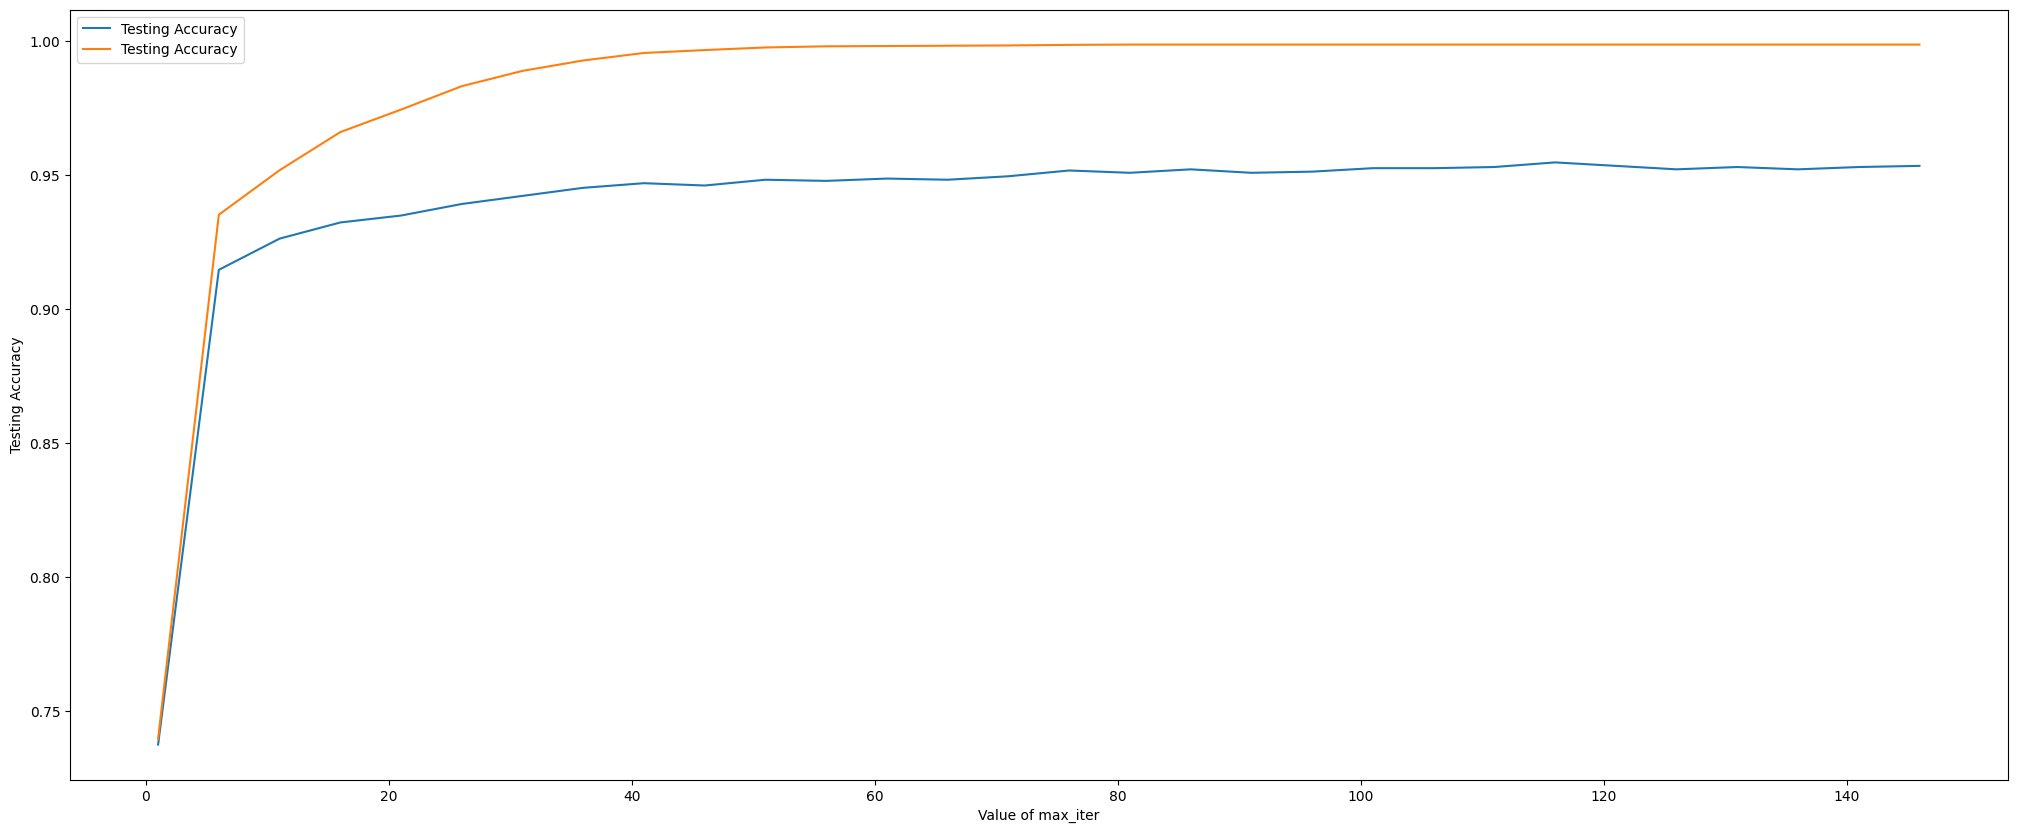

In [47]:
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import accuracy_score
N=150
k_range = range (1,N+1,5)
scores={}
scores_list = []
scores_list_train = []
for k in k_range:
  classifier = HistGradientBoostingClassifier(max_iter=k,random_state=0)
  classifier.fit(X_train, y_train)


  y_pred=classifier.predict(X_test)
  test_accu = accuracy_score(y_test,y_pred)
  scores[k] = test_accu
  scores_list.append(test_accu)

  y_pred=classifier.predict(X_train)
  train_accu = accuracy_score(y_train,y_pred)
  scores_list_train.append(train_accu)

  print(str(k)+"/"+str(N)+" round completed......................... Test Accuracy: "+str(test_accu)," >>>>>>> Train Accuracy: "+str(train_accu))



%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.plot(k_range,scores_list_train)
plt.xlabel('Value of max_iter')
plt.ylabel ('Testing Accuracy')
plt.legend(["Testing Accuracy", "Testing Accuracy"], loc=0, frameon=True)


print("The best max_iter:")
best_iter = list(scores.keys())[scores_list.index(max(scores_list))]
print(best_iter)

## Tuning max_depth

1/50 round completed......................... Test Accuracy: 0.868103448275862  >>>>>>> Train Accuracy: 0.8776676007760293
6/50 round completed......................... Test Accuracy: 0.9508620689655173  >>>>>>> Train Accuracy: 0.9977365811597327
11/50 round completed......................... Test Accuracy: 0.9482758620689655  >>>>>>> Train Accuracy: 0.9987066178055616
16/50 round completed......................... Test Accuracy: 0.95  >>>>>>> Train Accuracy: 0.9987066178055616
21/50 round completed......................... Test Accuracy: 0.9512931034482759  >>>>>>> Train Accuracy: 0.9987066178055616
26/50 round completed......................... Test Accuracy: 0.9525862068965517  >>>>>>> Train Accuracy: 0.9987066178055616
31/50 round completed......................... Test Accuracy: 0.9525862068965517  >>>>>>> Train Accuracy: 0.9987066178055616
36/50 round completed......................... Test Accuracy: 0.9525862068965517  >>>>>>> Train Accuracy: 0.9987066178055616
41/50 round compl

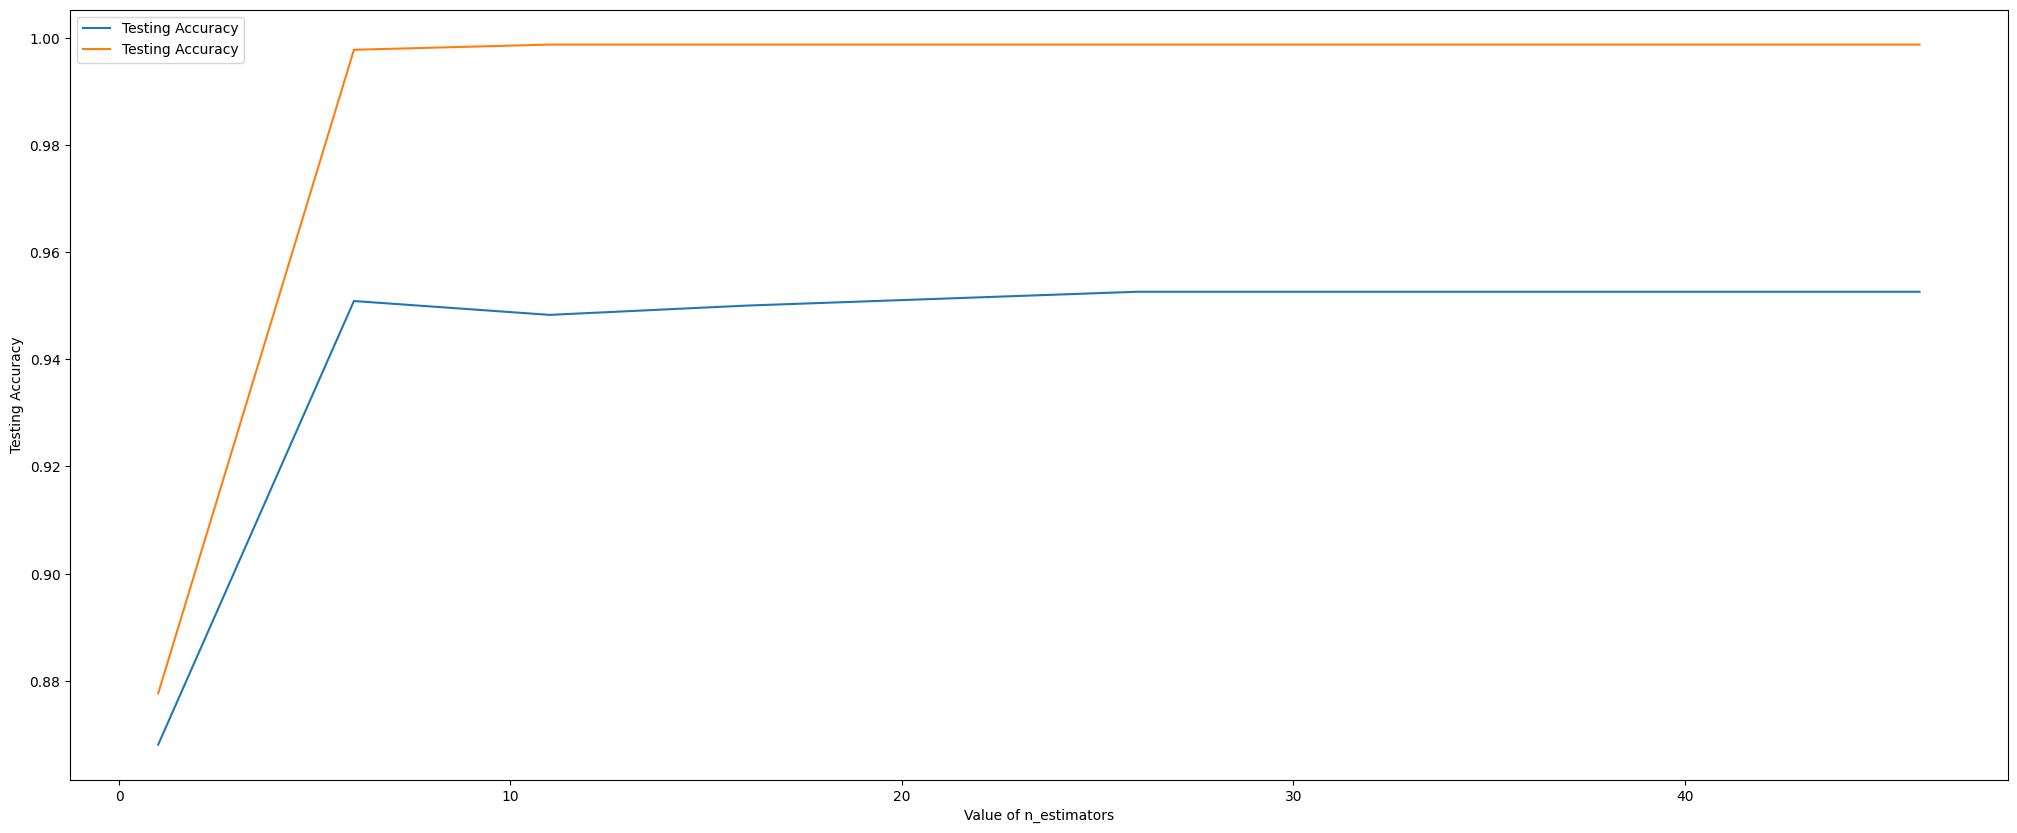

In [48]:
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import accuracy_score
N=50
k_range = range (1,N+1,5)
scores={}
scores_list = []
scores_list_train = []
for k in k_range:
  classifier = HistGradientBoostingClassifier(max_depth=k,random_state=0)
  classifier.fit(X_train, y_train)

  y_pred=classifier.predict(X_test)
  test_accu = accuracy_score(y_test,y_pred)
  scores[k] = test_accu
  scores_list.append(test_accu)

  y_pred=classifier.predict(X_train)
  train_accu = accuracy_score(y_train,y_pred)
  scores_list_train.append(train_accu)


  print(str(k)+"/"+str(N)+" round completed......................... Test Accuracy: "+str(test_accu)," >>>>>>> Train Accuracy: "+str(train_accu))



%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.plot(k_range,scores_list_train)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')
plt.legend(["Testing Accuracy", "Testing Accuracy"], loc=0, frameon=True)


print("The best Depth:")
best_depth = list(scores.keys())[scores_list.index(max(scores_list))]
print(best_depth)

In [49]:
hg_all = HistGradientBoostingClassifier(max_iter=best_estimator,max_depth=best_depth,random_state=0)
hg_all.fit(X_train, y_train)
y_pred = hg_all.predict(X_test)
print("Accuracy: ",accuracy_score(y_test,y_pred))

Accuracy:  0.9534482758620689


In [50]:
hg_all = HistGradientBoostingClassifier(max_iter=best_estimator,max_depth=best_depth,random_state=0)
hg_all.fit(X_train, y_train)
y_pred = hg_all.predict(X_train)
print("Accuracy: ",accuracy_score(y_train,y_pred))

Accuracy:  0.9987066178055616
